In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t

In [36]:
#Q2
#Import data
df=pd.read_csv(r'C:\Users\Chenyi\Desktop\LR\hw1\copier_maintenance.txt',delim_whitespace = True)
df

,minutes,copiers
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1
5,137,10
6,68,5
7,89,5
8,4,1
9,32,2


In [37]:
y=df.loc[:,'minutes'].values #transform series into array
x=df.loc[:,'copiers'].values

X=np.ones([len(x),2])
X[:,1]=x

In [38]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     968.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           4.01e-31
Time:                        18:19:30   Log-Likelihood:                -161.27
No. Observations:                  45   AIC:                             326.5
Df Residuals:                      43   BIC:                             330.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5802      2.804     -0.207      0.8

In [39]:
#2C
test=(15.0352-14)/(0.483)
p_value=t.sf(test, 43)
print(p_value)

0.0188954308469501


In [40]:
#Q3
df2=pd.read_csv(r'C:\Users\Chenyi\Desktop\LR\hw1\SENIC.txt',delim_whitespace = True)
df2

,ID,Stay,Age,Risk,Cult,Xray,Beds,MS,Reg,Cen,Nurses,AFS
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
109,110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
110,111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9
111,112,17.94,56.2,5.9,26.4,91.8,835,1,1,791,407,62.9


In [41]:
#3a
def change(x):
    if x==2:
        return 0
    else:
        return x
    
df2['MS']=df2['MS'].apply(change)
df2

,ID,Stay,Age,Risk,Cult,Xray,Beds,MS,Reg,Cen,Nurses,AFS
0,1,7.13,55.7,4.1,9.0,39.6,279,0,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,0,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,0,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,0,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,0,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
109,110,9.50,49.3,5.8,42.0,70.9,98,0,3,68,46,22.9
110,111,7.70,56.9,4.4,12.2,67.9,129,0,4,85,136,62.9
111,112,17.94,56.2,5.9,26.4,91.8,835,1,1,791,407,62.9


In [42]:
#3b
import plotly.express as px

matrix = df2[['Risk','Stay','Age','Xray']]
fig = px.scatter_matrix(matrix)
fig.show()

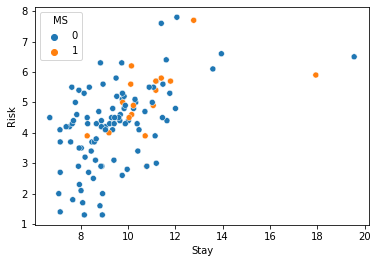

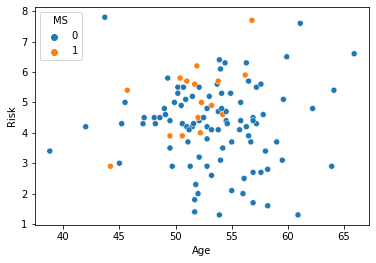

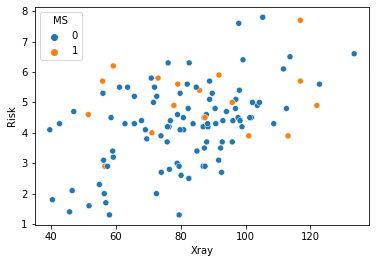

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

x=['Stay','Age','Xray']
for i in x:
    sns.scatterplot(x=i, y='Risk',data=df2,hue='MS')
    plt.show()

In [44]:
#3C
#The first model
y=df2['Risk'].values
x1=df2['Stay'].tolist()
x2=df2['Age'].tolist()
x3=df2['Xray'].tolist()
x4=df2['MS'].tolist()
X1=np.array([[1]*len(y),x1,x2,x3,x4]).T
X1

model_1 = sm.OLS(y, X1).fit()
print(model_1.summary())

#The second model
def cross_variable(x):
    cross=[]
    for i in range(len(y)):
        cross.append(x[i]*x4[i])
    return cross

x5=cross_variable(x1)
x6=cross_variable(x2)
x7=cross_variable(x3)
X2=np.array([[1]*len(y),x1,x2,x3,x4,x5,x6,x7]).T
model_2= sm.OLS(y, X2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     15.73
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           3.57e-10
Time:                        18:19:31   Log-Likelihood:                -167.05
No. Observations:                 113   AIC:                             344.1
Df Residuals:                     108   BIC:                             357.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8574      1.324      0.647      0.5

In [45]:
from statsmodels.stats.api import anova_lm
print(anova_lm(model_1,model_2))

   df_resid         ssr  df_diff   ss_diff         F   Pr(>F)
0     108.0  127.243169      0.0       NaN       NaN      NaN
1     105.0  121.058094      3.0  6.185075  1.788213  0.15393
